In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
pd.options.display.max_rows=None
pd.options.display.max_columns=None
sns.set()

Housing Dataset Analysis :

In [32]:
data= pd.read_csv('house.csv')

Dataset Description

-Bedroom count: This attribute represents the number of bedrooms in the housing unit, providing insights into its size and capacity.

-Net Square Meters (Net Sqm): Net square meters refer to the total usable interior space within the housing unit, excluding common areas like corridors and           stairwells. It quantifies the size of the property.

-Center Distance: This attribute measures the distance of the housing unit from the central or downtown area of a city or town. It is a valuable metric for potential buyers or renters to assess proximity to urban amenities and activities.

-Metro Distance: Metro distance indicates the distance between the housing unit and the nearest metro or subway station. This information is particularly useful for individuals who rely on public transportation for their daily commute.

-Floor: The floor attribute specifies the level or story of the housing unit within the building, offering insights into its placement and accessibility within the structure.
-Age: The age of the property represents the number of years since its construction or renovation. It plays a crucial role in assessing the condition of the property and potential maintenance requirements.

-Price: Price is the cost associated with purchasing or renting the housing unit.

In [33]:
data.head(5)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722568
2,1,36.980709,692.09,111.224999,24,24,98112.519942
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [34]:
data.tail()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
4040,14,600.285032,499.92,84.714882,1,2,115050.425194
4041,14,242.912020,1408.20,94.257176,2,34,99862.768731
4042,14,381.986238,1600.48,175.757426,2,64,103316.062406
4043,17,750.971604,402.62,40.985933,1,80,118134.771190
4044,17,644.319019,229.89,-63.470240,1,76,115683.549545


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045 entries, 0 to 4044
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4045 non-null   int64  
 1   net_sqm          4045 non-null   float64
 2   center_distance  4045 non-null   float64
 3   metro_distance   4045 non-null   float64
 4   floor            4045 non-null   int64  
 5   age              4045 non-null   int64  
 6   price            4045 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 221.3 KB


Features with negative value:

In [36]:
(data<0).sum()

bedroom_count        0
net_sqm             18
center_distance      0
metro_distance     430
floor                0
age                  0
price                0
dtype: int64

In [37]:
data[(data< 0).any(axis=1)]
data.sample(5)




,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
564,1,14.169013,1251.35,76.169267,23,16,94263.601456
2807,4,74.914021,1102.02,48.924578,11,13,95789.857383
1645,2,88.904100,1655.82,245.859423,12,83,92443.171931
338,1,30.913946,124.68,-22.979345,5,42,92799.913189
1183,2,72.463451,70.82,-11.377637,2,6,97793.569826


Clear negative values:

In [38]:
data[data< 0] = np.nan
data.dropna(inplace=True)
df=data.reset_index(drop=True)
df.sample(5)

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
1058,2,29.007459,1715.15,93.643431,21,4,91207.198125
274,1,29.136260,643.29,111.783290,3,71,94321.179496
321,1,63.713209,347.38,21.731525,12,75,94407.689877
263,1,40.755089,1995.32,159.606349,7,36,89996.027942
2294,4,172.236498,842.30,117.936440,9,92,97269.792142


In [39]:
df.shape

(3598, 7)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3598 entries, 0 to 3597
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    3598 non-null   int64  
 1   net_sqm          3598 non-null   float64
 2   center_distance  3598 non-null   float64
 3   metro_distance   3598 non-null   float64
 4   floor            3598 non-null   int64  
 5   age              3598 non-null   int64  
 6   price            3598 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 196.9 KB


Distribution and correlation of the features

Price:

In [41]:
df.price.describe()

count      3598.000000
mean      95607.488284
std        3780.596105
min       84153.485790
25%       93045.613846
50%       95305.843803
75%       97748.322721
max      118134.771190
Name: price, dtype: float64

Outliers

In [42]:
min = df["price"].min
q1 =df["price"].quantile(0.25)
q2 = df["price"].median()
q3 = df["price"].quantile(0.75)
IQR = q3-q1

LB= q1-(1.5*IQR)
UB = q3+(1.5 *IQR)

print(f"Lower Boundry : {LB}")
print(f"Upper Boundry : {UB}")

Lower Boundry : 85991.55053275061
Upper Boundry : 104802.38603385695


In [43]:
print("Outliers Upper Boundry =", df[df.price> UB].shape[0])

Outliers Upper Boundry = 71


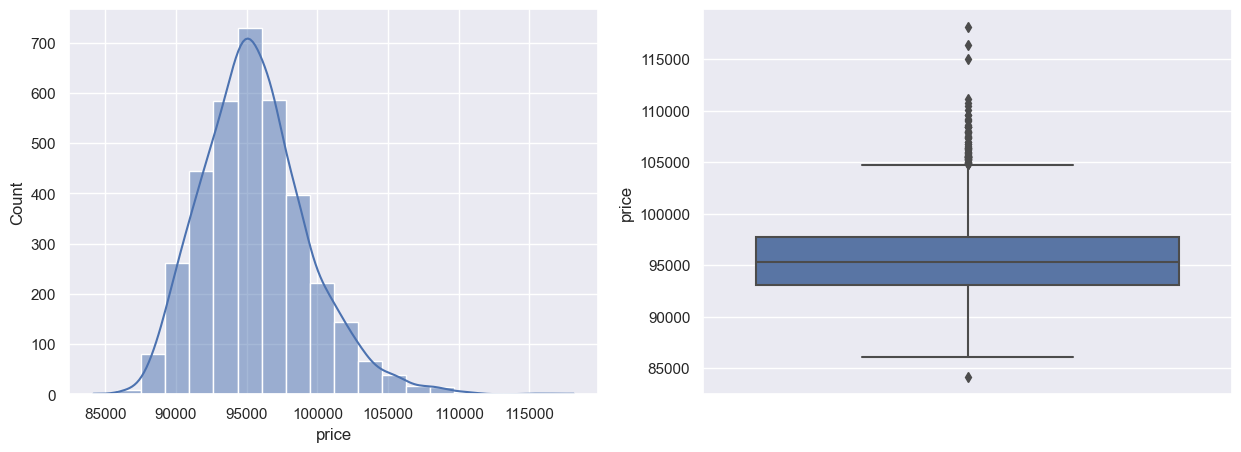

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["price"], kde=True, bins=20)

plt.subplot(1, 2, 2)
sns.boxplot(y="price", data=df)
plt.show()

Distribution:


In [45]:
mean_price = np.mean(df["price"])
std_price = np.std(df["price"])
print(f"mean price = {mean_price}")
print(f"Std price = {std_price}")

mean price = 95607.4882838116
Std price = 3780.070694172772


In [46]:
upper_limit = mean_price + 1 * std_price
lower_limit = mean_price - 1 * std_price
((df["price"] < upper_limit) & (df["price"] > lower_limit)).mean()

0.7017787659811006

We can see that 70% of the data lies within one standard deviation from the mean

In [47]:
upper_limit = mean_price + 2 * std_price
lower_limit = mean_price - 2 * std_price
((df["price"] < upper_limit) & (df["price"] > lower_limit)).mean()

0.9580322401334075

We can see that 95% of the data lies within two standard deviation from the mean

In [48]:
upper_limit = mean_price + 3 * std_price
lower_limit = mean_price - 3 * std_price
((df["price"] < upper_limit) & (df["price"] > lower_limit)).mean()

0.9916620344635909

We can see that 99.1% of the data lies within three standard deviation from the mean

The distribution of the price seems to have outliers in the right side but it seems approximately normal distributed by the calculation.

The median price is around 95000 and the upper extreme price and lower extreme price lies around 105000 and 85000.

Correlation:

C:\Users\johnw\AppData\Local\Temp\ipykernel_13520\2717426836.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\johnw\AppData\Local\Temp\ipykernel_13520\2717426836.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\johnw\AppData\Local\Temp\ipykernel_13520\2717426836.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\johnw\AppData\Local\Temp\ipykernel_13520\2717426836.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\johnw\AppData\Local\Temp\ipykernel_13520\2717426836.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\johnw\AppData\Local\Temp\ipykernel_13520\2717426836.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


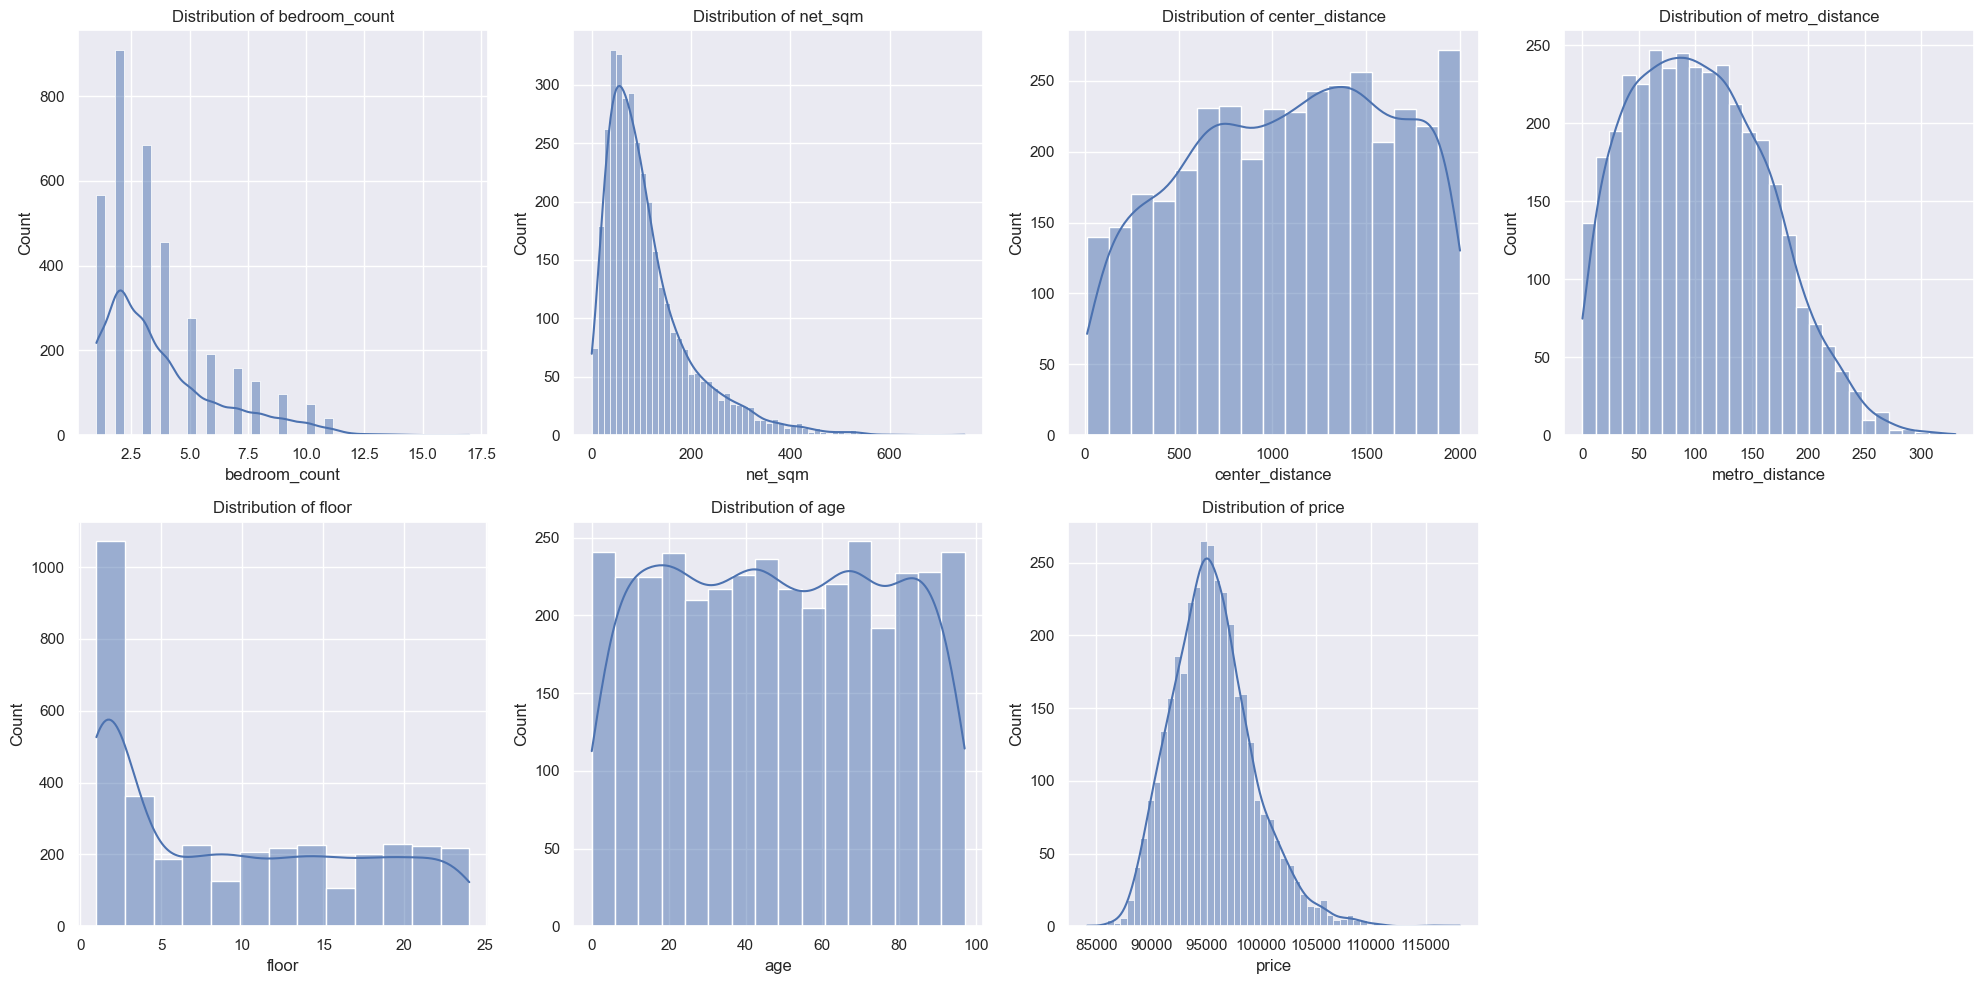

In [49]:
plt.figure(figsize=(20,10))
for e,i in enumerate(df.columns[:]):
    plt.subplot(2,4,e+1)
    sns.histplot(df[i], kde= True)
    plt.title('Distribution of ' +i)
    plt.tight_layout()

Bedroom Count:

In [50]:
bedroom_count=df["bedroom_count"].value_counts().reset_index()
bedroom_count

,bedroom_count,count
0,2,910
1,3,684
2,1,567
3,4,456
4,5,276
5,6,191
6,7,159
7,8,128
8,9,97
9,10,74


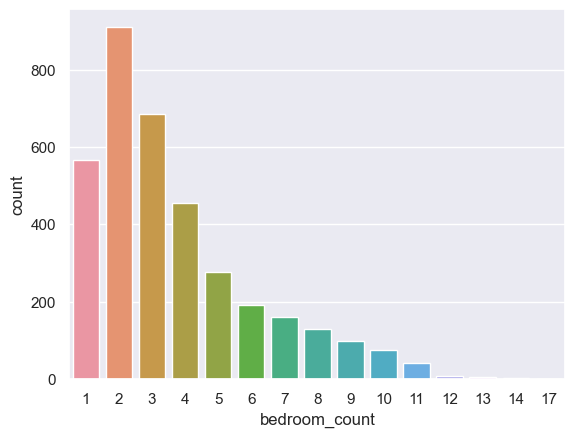

In [51]:
sns.countplot(x="bedroom_count", data=df)
plt.show()

We can see that the house that has 2 bedroom is the most common in our dataset followed by the house with 3 bedrooms.

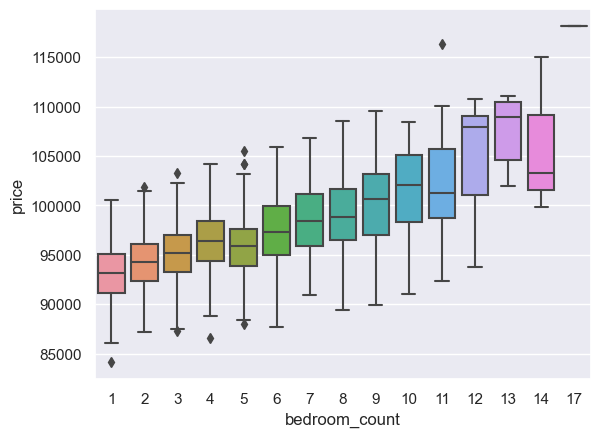

In [52]:
sns.boxplot(x="bedroom_count", y="price", data=df)
plt.show()

We can see is that with the increase of the bedrooms, the median price of the house also goes up

Net Square Meters (Net Sqm):

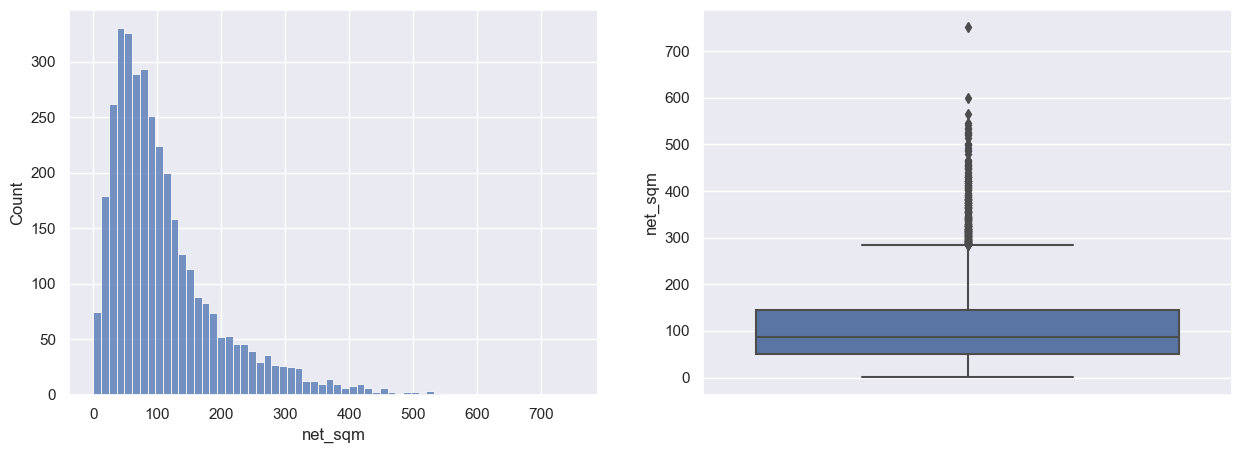

In [53]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["net_sqm"])

plt.subplot(1, 2, 2)
sns.boxplot(y="net_sqm", data=df)
plt.show()

Net_sqm feature has highly right skewed distribution (It means some houses has a lot of net_sqm than most of the houses) and the median net_sqm of the house is around 100

Center Distance:

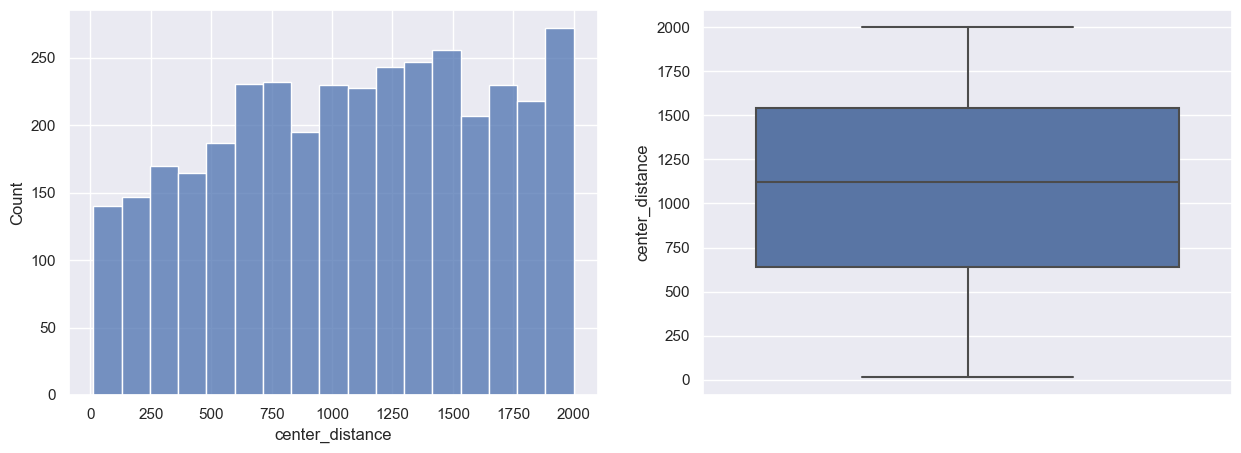

In [54]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["center_distance"])

plt.subplot(1, 2, 2)
sns.boxplot(y="center_distance", data=df)
plt.show()

Center_distance feature has the approximate uniform distribution and its median value is around 1000

Metro Distance:

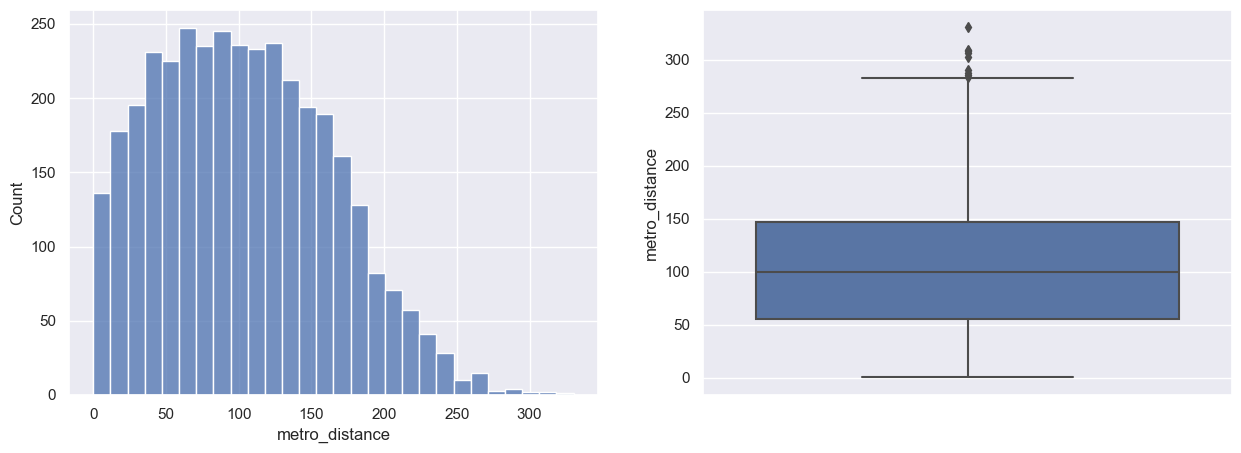

In [55]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["metro_distance"])

plt.subplot(1, 2, 2)
sns.boxplot(y="metro_distance", data=df)
plt.show()

We can see the metro distance has normal distribution and its median value is around 100 .

Floor:

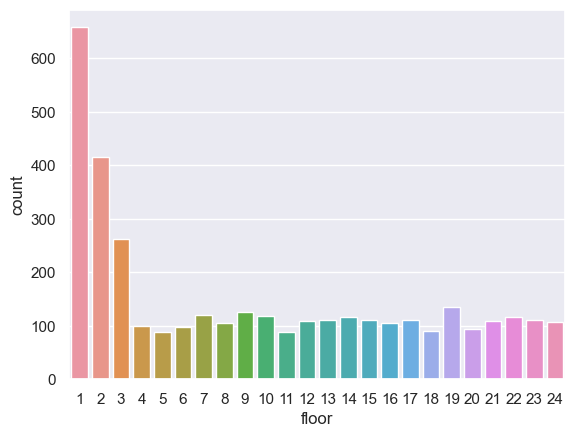

In [56]:
sns.countplot(x="floor", data=df)
plt.show()

The house that has one floor is the most common in the dataset and the maximum value of the floor of the house is around 24

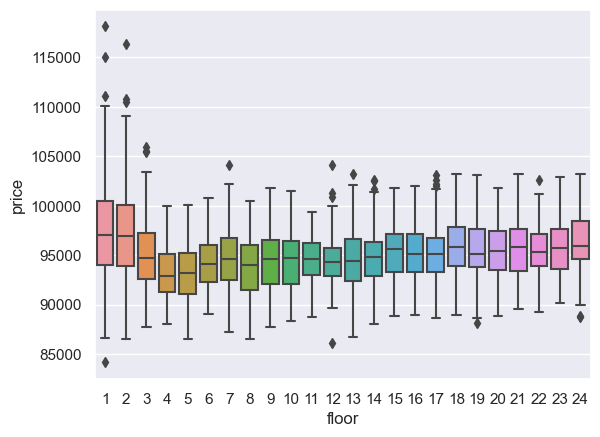

In [57]:
sns.boxplot(x="floor", y="price", data=df)
plt.show()

I don't see the price increasement with the increase in floor in the house.

Age:

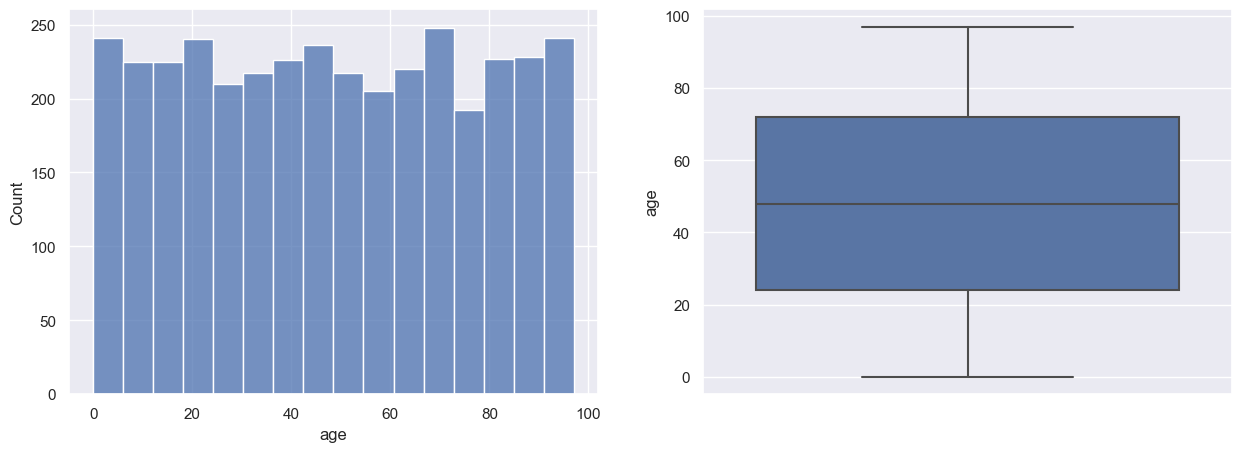

In [58]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["age"])

plt.subplot(1, 2, 2)
sns.boxplot(y="age", data=df)
plt.show()

He age distribution is like uniform distribution, The median age is around over 40.

c:\Users\johnw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


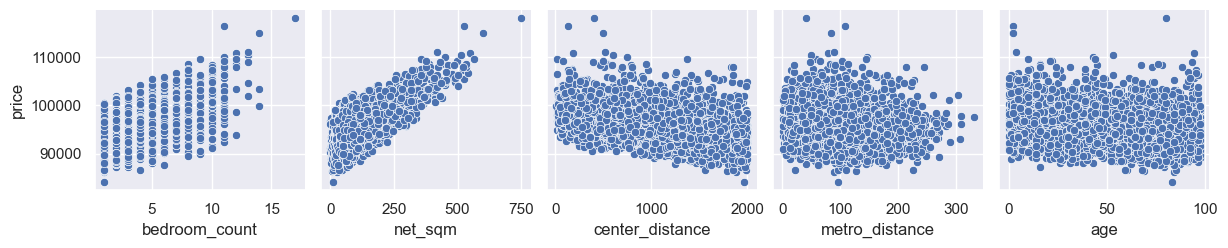

In [59]:
data_corr= ['bedroom_count','net_sqm', 'center_distance', 'metro_distance', 'age']
sns.pairplot(data=df, x_vars=data_corr, y_vars=["price"])
plt.show()

Text(0.5, 1.0, 'Correlation coefficient between numerical columns')

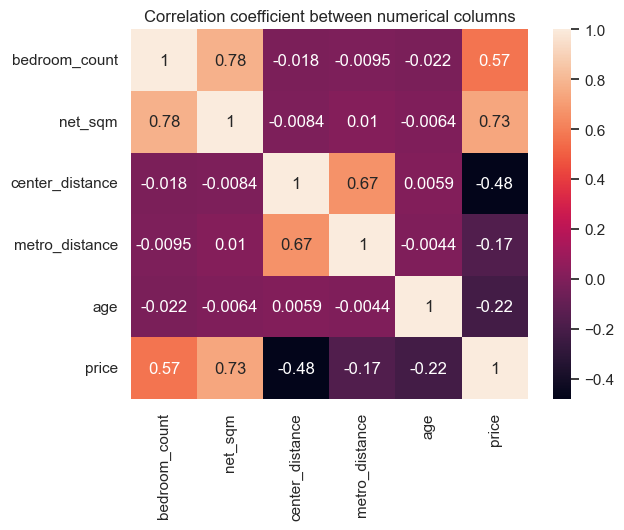

In [60]:
ALL_Data=df[['bedroom_count','net_sqm', 'center_distance', 'metro_distance', 'age',"price"]]
sns.heatmap(ALL_Data.corr(),annot=True)
plt.title("Correlation coefficient between numerical columns")

We see that price has a strong positive relationship with net_sqm at 73% and a positive relationship with bedroom_count at 57%, while the rest of the features have strong negative values.

Conclusion

The analysis of the housing dataset provides valuable insights into the factors that influence housing prices.
The number of bedrooms and Net Square  are the most influential factors positively associated with price.
Center Distance and Metro Distance are important for assessing proximity to urban amenities.
Floor and property age have less pronounced effects on housing prices.
This analysis can be used to make informed decisions regarding pricing and property selection in the housing market.